In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Calculate the date 1 year ago from today
yr_ago = dt.date.today() - dt.timedelta(days=730)

In [11]:
yr_ago


datetime.date(2016, 10, 12)

In [12]:
# Perform a query to retrieve the data and precipitation scores
yr_16_17_prcp_dates = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= yr_ago).\
    order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(yr_16_17_prcp_dates).dropna()




In [14]:
# Sort the dataframe by date
df['date'] = pd.to_datetime(df['date'])


<IPython.core.display.Javascript object>


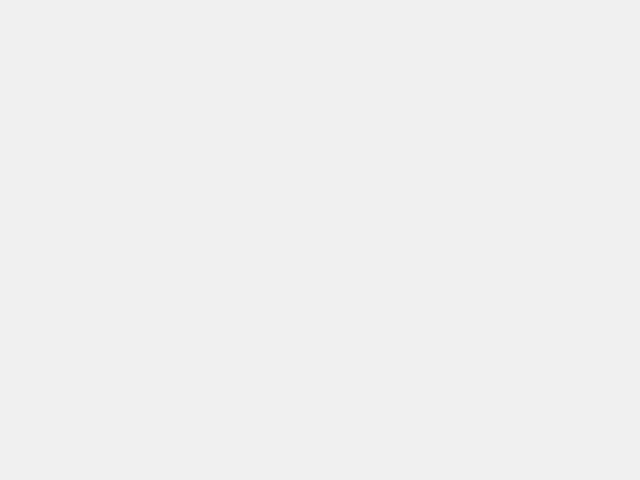

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates
plt.plot(df['date'], df['prcp'])

plt.title("Precipitation in Hawaii")
plt.xlabel('')
plt.ylabel('Rainfall (Inches)')
plt.xticks(rotation='90')

plt.tight_layout()
plt.show()

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from today

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,1731.000000
mean,0.161756
std,0.423333
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


In [19]:
# How many stations are available in this dataset?
stations = session.query(Measurement.station).distinct().count()

In [20]:
stations

9

In [21]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

In [22]:
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:

highest_station_activity = session.query(Measurement.station, 
                                    func.count(Measurement.station).\
                                    label('count')).\
                                    group_by(Measurement.station).limit(1)[0][0]

temps = [func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]
                
session.query(*temps).filter(Measurement.station==highest_station_activity).all()

[(53.0, 87.0, 71.61596766043456)]

In [27]:
highest_station_activity

'USC00511918'

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_active_tobs = session.query(Measurement.tobs).filter(Measurement.station==highest_station_activity).\
                                filter(Measurement.date >= yr_ago).order_by(Measurement.date.desc())



In [38]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [53]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# calculate the min/max/avg from last year that matches my trip date
trip_arrive = dt.date.today() - dt.timedelta(days=751)
trip_leave = dt.date.today() - dt.timedelta(days=741)
last_year = dt.timedelta(days=1095)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67.0, 76.275, 84.0)]


In [47]:
trip_arrive

datetime.date(2016, 9, 21)

In [50]:
trip_leave

datetime.date(2016, 10, 1)

<IPython.core.display.Javascript object>


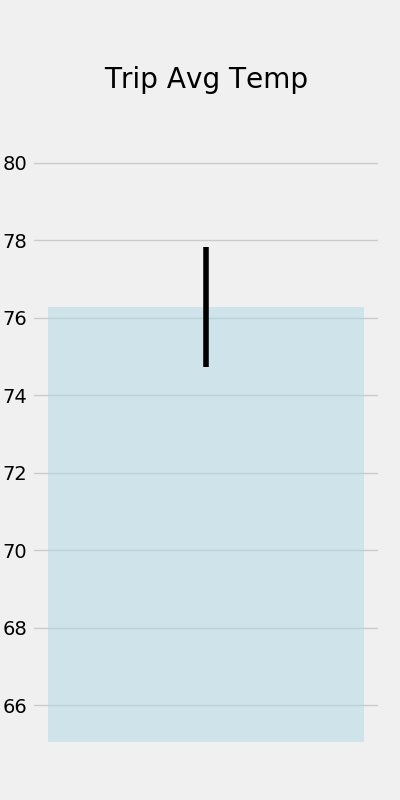

(65, 81.71625000000002)

In [66]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = temp_avg_lst_year[0][1] - temp_avg_lst_year[0][0]
upper = temp_avg_lst_year[0][2] - temp_avg_lst_year[0][1]

plt.figure(figsize=(4,8))
plt.bar(0, temp_avg_lst_year[0][1], yerr=[upper-lower], color='lightblue', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(65)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
